In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import array, mean, append, std
from numpy.random import shuffle
from random import choice, randint
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

X = digits['data']
target = digits['target']

**Part A: Train a Linear Classifier on Digits Dataset**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = .5)

In [4]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

**Part B: Implement the Given Function**

In [5]:
# Tests classifier model M on 10**4 random samples of labeled data set (X,Y)
# (predictive attributes in X; labels in Y), each of size testSize, and
# returns an array of the mean classification accuracies for these samples

def testModel(M, X, y, testSize):

    accuracies = []
    indexes = array(list(range(0, testSize)))

    for _ in range(10**4):

        sample_X = []
        sample_y = []

        for _ in range(testSize):

            # shuffle the indices 
            shuffle(indexes)

            sample_X.append(X[indexes[0]])
            sample_y.append(y[indexes[0]])

        sample_X = array(sample_X)
        sample_y = array(sample_y)

        # perform predictions on the test splits and get the accuracy 
        accuracy = M.score(sample_X, sample_y)

        # append accuracy to array of accuracies 
        accuracies.append(accuracy)

    return accuracies


Mean (k=0): 0.917000
Stdev (k=0): 0.056000

Mean (k=1): 0.938000
Stdev (k=1): 0.035000

Mean (k=2): 0.959000
Stdev (k=2): 0.020000

Mean (k=3): 0.937000
Stdev (k=3): 0.017000

Mean (k=4): 0.945000
Stdev (k=4): 0.012000

Mean (k=5): 0.939000
Stdev (k=5): 0.009000


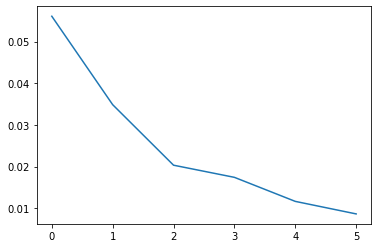

In [6]:
deviations = []

for k in range(0, 5+1):

    num_rows = 24 * (2**k)

    test_X = X_test[0:num_rows]
    test_Y = y_test[0:num_rows]

    accuracies = testModel(clf, test_X, test_Y, len(test_X))

    print("\nMean (k={}): {:f}".format(k, round(mean(accuracies), 3)))
    print("Stdev (k={}): {:f}".format(k, round(std(accuracies), 3)))

    deviations.append(std(accuracies))

plt.plot(list(range(6)), deviations)